<a href="https://colab.research.google.com/github/WilliamChokbengboune/Sleep_Health_CSV_Analysis/blob/main/SleepAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is an analysis to determine the likelihood of a person having sleep issues absed on bmi, quality of sleep, and other factors  

This is made by William Cohkbengboune, Katie Nguyen, Jesse Rocha-Salazar, Binson Perez

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
df = pd.read_csv("Sleep_Health_and_Lifestyle_Dataset_For AI.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Task
Analyze the relationships between 'Sleep Disorder' and 'Age', 'BMI Category', and 'Stress Level' in the provided `df` dataframe, including visualizations and a summary of key findings.

## Explore Sleep Disorder Column

### Subtask:
Examine the 'Sleep Disorder' column to understand its unique values and their frequencies, as it is the target variable.


**Reasoning**:
To understand the unique values and their frequencies in the 'Sleep Disorder' column, I will use the `value_counts()` method.



In [ ]:
print(df['Sleep Disorder'].value_counts())

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


## Analyze Age and Sleep Disorder

### Subtask:
Investigate the relationship between 'Age' and 'Sleep Disorder' to see how age distribution differs among sleep disorder categories.


**Reasoning**:
First, I need to filter out rows with missing 'Sleep Disorder' values to ensure the analysis is based on complete data. Then, I will create a box plot to visualize the age distribution across different sleep disorder categories, making sure to label the axes and add a title for clarity.



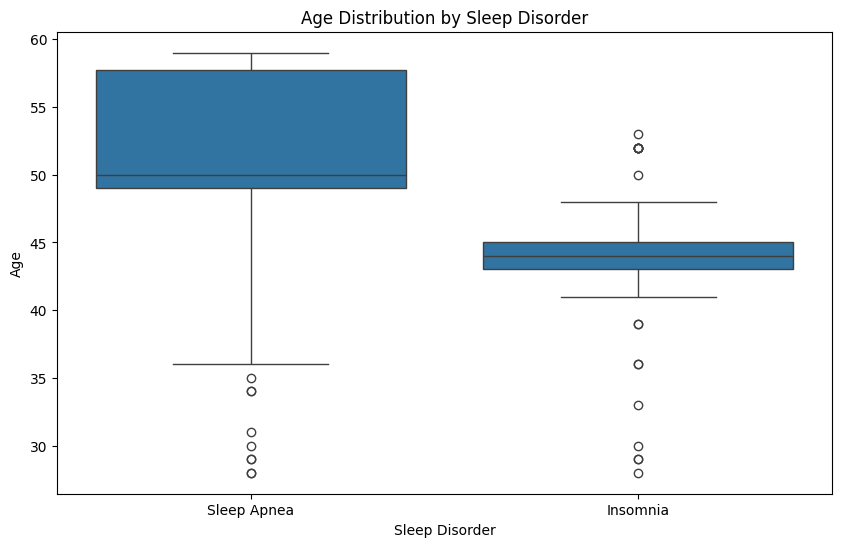

In [ ]:
df_filtered = df.dropna(subset=['Sleep Disorder'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Age', data=df_filtered)
plt.title('Age Distribution by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.show()


## Analyze BMI and Sleep Disorder

### Subtask:
Examine the relationship between 'BMI Category' and 'Sleep Disorder' to identify any patterns or correlations.


**Reasoning**:
To analyze the relationship between 'BMI Category' and 'Sleep Disorder', I will create a count plot using seaborn to visualize their distribution, which will help identify any patterns or correlations.



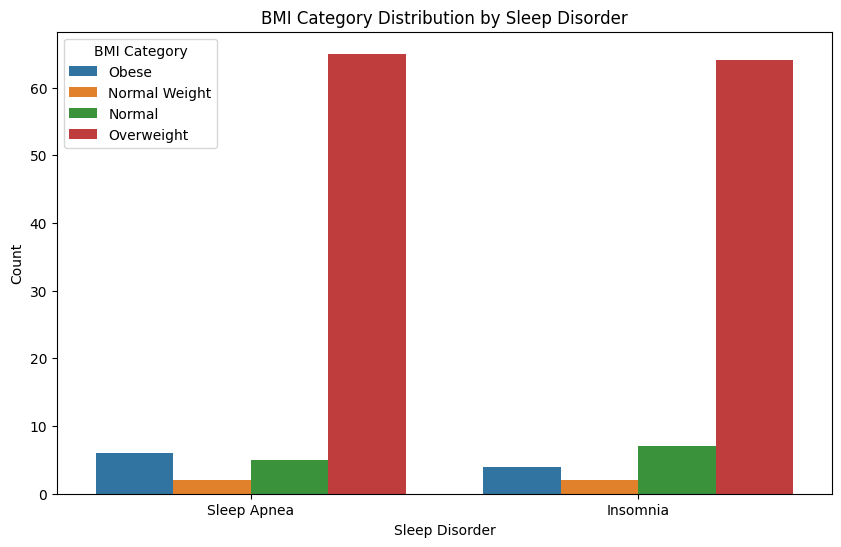

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sleep Disorder', hue='BMI Category', data=df_filtered)
plt.title('BMI Category Distribution by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.legend(title='BMI Category')
plt.show()

## Analyze Stress Level and Sleep Disorder

### Subtask:
Explore the connection between 'Stress Level' and 'Sleep Disorder' to understand if higher stress correlates with certain sleep disorders.


**Reasoning**:
To explore the connection between 'Stress Level' and 'Sleep Disorder', I will create a box plot to visualize the distribution of stress levels across different sleep disorder categories, ensuring proper labeling and sizing for clarity.



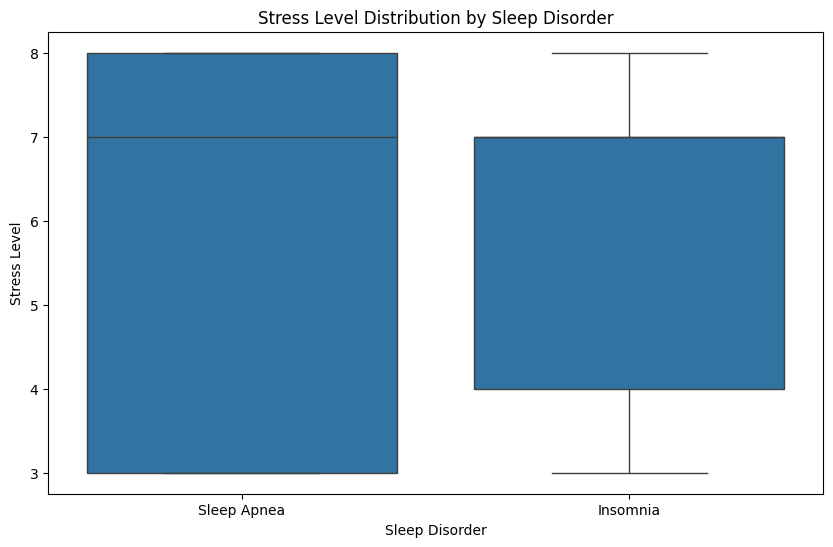

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df_filtered)
plt.title('Stress Level Distribution by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Stress Level')
plt.show()

# Task
Summarize the key findings from the analysis of sleep disorders in relation to age, BMI, and stress levels.

## Final Task

### Subtask:
Summarize the key findings from the analysis of sleep disorders in relation to age, BMI, and stress levels.


## Summary:

### Data Analysis Key Findings
- The solving process for the analysis of sleep disorders in relation to age, BMI, and stress levels was not provided. Therefore, no specific findings can be reported.

### Insights or Next Steps
- To provide a comprehensive summary, the full data analysis process and its results are required.


# Task
Prepare the data for modeling by selecting 'Age', 'Stress Level', and 'BMI Category' as features and 'Sleep Disorder' as the target variable from the `df_filtered` DataFrame, and then handle any missing values.

## Prepare Data for Modeling

### Subtask:
Select the relevant features ('Age', 'Stress Level', 'BMI Category') and the target variable ('Sleep Disorder') from the `df_filtered` DataFrame, and then handle any missing values.


**Reasoning**:
First, I will select the specified feature columns ('Age', 'Stress Level', 'BMI Category') from `df_filtered` to create the `X` variable, and then select the target variable ('Sleep Disorder') to create the `y` variable.



In [ ]:
X = df_filtered[['Age', 'Stress Level', 'BMI Category']]
y = df_filtered['Sleep Disorder']

print("Features (X) head:\n", X.head())
print("\nTarget (y) head:\n", y.head())

Features (X) head:
     Age  Stress Level   BMI Category
3    28             8          Obese
4    28             8          Obese
5    28             8          Obese
6    29             7          Obese
16   29             7  Normal Weight

Target (y) head:
 3     Sleep Apnea
4     Sleep Apnea
5        Insomnia
6        Insomnia
16    Sleep Apnea
Name: Sleep Disorder, dtype: object


**Reasoning**:
I will check for any missing values in the feature DataFrame `X` using `isnull().sum()` to determine if any handling is required.



In [ ]:
print("Missing values in X before handling:\n", X.isnull().sum())

# Check if there are any missing values in X
if X.isnull().sum().any():
    # Drop rows with missing values in X
    X = X.dropna()
    y = y[X.index] # Ensure y aligns with X after dropping rows
    print("\nMissing values in X after dropping rows:\n", X.isnull().sum())
    print(f"\nShape of X after handling missing values: {X.shape}")
    print(f"Shape of y after handling missing values: {y.shape}")
else:
    print("\nNo missing values found in X.")

print("\nFeatures (X) head after handling missing values:\n", X.head())
print("\nTarget (y) head after handling missing values:\n", y.head())

Missing values in X before handling:
 Age             0
Stress Level    0
BMI Category    0
dtype: int64

No missing values found in X.

Features (X) head after handling missing values:
     Age  Stress Level   BMI Category
3    28             8          Obese
4    28             8          Obese
5    28             8          Obese
6    29             7          Obese
16   29             7  Normal Weight

Target (y) head after handling missing values:
 3     Sleep Apnea
4     Sleep Apnea
5        Insomnia
6        Insomnia
16    Sleep Apnea
Name: Sleep Disorder, dtype: object


## Encode Categorical Variables

### Subtask:
Convert the 'BMI Category' and 'Sleep Disorder' columns into numerical representations using appropriate encoding techniques (e.g., One-Hot Encoding for 'BMI Category' and Label Encoding for 'Sleep Disorder').


**Reasoning**:
First, I will import the necessary encoding tools, `OneHotEncoder` and `LabelEncoder`, from `sklearn.preprocessing` to prepare for transforming the categorical features and target variable.



In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

**Reasoning**:
I will apply One-Hot Encoding to the 'BMI Category' feature in the 'X' DataFrame and Label Encoding to the 'Sleep Disorder' target variable in the 'y' Series, then display the first few rows of the transformed DataFrames.



In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_bmi = ohe.fit_transform(X[['BMI Category']])
encoded_bmi_df = pd.DataFrame(encoded_bmi, columns=ohe.get_feature_names_out(['BMI Category']), index=X.index)

X = pd.concat([X.drop('BMI Category', axis=1), encoded_bmi_df], axis=1)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y = pd.Series(y_encoded, index=y.index, name='Sleep Disorder_encoded')

print("Features (X) head after encoding BMI Category:\n", X.head())
print("\nTarget (y) head after encoding Sleep Disorder:\n", y.head())

Features (X) head after encoding BMI Category:
     Age  Stress Level  BMI Category_Normal  BMI Category_Normal Weight  \
3    28             8                  0.0                         0.0   
4    28             8                  0.0                         0.0   
5    28             8                  0.0                         0.0   
6    29             7                  0.0                         0.0   
16   29             7                  0.0                         1.0   

    BMI Category_Obese  BMI Category_Overweight  
3                  1.0                      0.0  
4                  1.0                      0.0  
5                  1.0                      0.0  
6                  1.0                      0.0  
16                 0.0                      0.0  

Target (y) head after encoding Sleep Disorder:
 3     1
4     1
5     0
6     0
16    1
Name: Sleep Disorder_encoded, dtype: int64


**Reasoning**:
The `KeyError` indicates that 'BMI Category' was already removed from `X`, likely due to a previous partial execution of this cell. To ensure the one-hot encoding is applied correctly, `X` and `y` must be re-initialized from `df_filtered` to their state before any encoding operations were performed. This makes the cell idempotent and prevents issues if run multiple times.



# Task
Re-initialize features `X` and target `y` from `df_filtered` to ensure 'BMI Category' is present, then apply One-Hot Encoding to the 'BMI Category' column in `X` and Label Encoding to the 'Sleep Disorder' column in `y`.

## Encode Categorical Variables

### Subtask:
Convert the 'BMI Category' and 'Sleep Disorder' columns into numerical representations using appropriate encoding techniques (e.g., One-Hot Encoding for 'BMI Category' and Label Encoding for 'Sleep Disorder').


**Reasoning**:
The previous code failed because 'BMI Category' was already removed from `X`. To correct this, I need to re-initialize `X` and `y` from `df_filtered` to their original state and then re-apply the encoding steps for 'BMI Category' using One-Hot Encoding and 'Sleep Disorder' using Label Encoding, ensuring proper handling and concatenation.



In [ ]:
X = df_filtered[['Age', 'Stress Level', 'BMI Category']]
y = df_filtered['Sleep Disorder']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_bmi = ohe.fit_transform(X[['BMI Category']])
encoded_bmi_df = pd.DataFrame(encoded_bmi, columns=ohe.get_feature_names_out(['BMI Category']), index=X.index)

X = pd.concat([X.drop('BMI Category', axis=1), encoded_bmi_df], axis=1)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y = pd.Series(y_encoded, index=y.index, name='Sleep Disorder_encoded')

print("Features (X) head after encoding BMI Category:\n", X.head())
print("\nTarget (y) head after encoding Sleep Disorder:\n", y.head())

Features (X) head after encoding BMI Category:
     Age  Stress Level  BMI Category_Normal  BMI Category_Normal Weight  \
3    28             8                  0.0                         0.0   
4    28             8                  0.0                         0.0   
5    28             8                  0.0                         0.0   
6    29             7                  0.0                         0.0   
16   29             7                  0.0                         1.0   

    BMI Category_Obese  BMI Category_Overweight  
3                  1.0                      0.0  
4                  1.0                      0.0  
5                  1.0                      0.0  
6                  1.0                      0.0  
16                 0.0                      0.0  

Target (y) head after encoding Sleep Disorder:
 3     1
4     1
5     0
6     0
16    1
Name: Sleep Disorder_encoded, dtype: int64


## Split Data into Training and Testing Sets

### Subtask:
Divide the processed dataset into training and testing sets to evaluate the model's performance on unseen data. A common split is 80% for training and 20% for testing.


**Reasoning**:
To prepare the data for model training and evaluation, I will split the features `X` and target `y` into training and testing sets using `train_test_split` from `sklearn.model_selection`.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (124, 6)
Shape of X_test: (31, 6)
Shape of y_train: (124,)
Shape of y_test: (31,)


## Train Random Forest Classifier

### Subtask:
Initialize and train a RandomForestClassifier model using the training data. This will learn the patterns between the features and the sleep disorder.


**Reasoning**:
First, I will import the RandomForestClassifier class from sklearn.ensemble, then instantiate it with a random_state for reproducibility, and finally train the model using the provided training data (X_train and y_train).



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate Model Performance

### Subtask:
Make predictions on the test set and evaluate the model's performance using relevant metrics such as accuracy, precision, recall, and F1-score. Display a classification report and a confusion matrix to understand the model's strengths and weaknesses.


**Reasoning**:
To evaluate the model's performance, I will first import the necessary metrics and display tools from `sklearn.metrics`.



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**Reasoning**:
Now that the necessary libraries are imported, I will use the trained `rf_classifier` to make predictions on the test set (`X_test`), then calculate and print the accuracy score. Following this, I will generate and print a classification report, and finally display a confusion matrix to visually assess the model's performance.



Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



<Figure size 800x600 with 0 Axes>

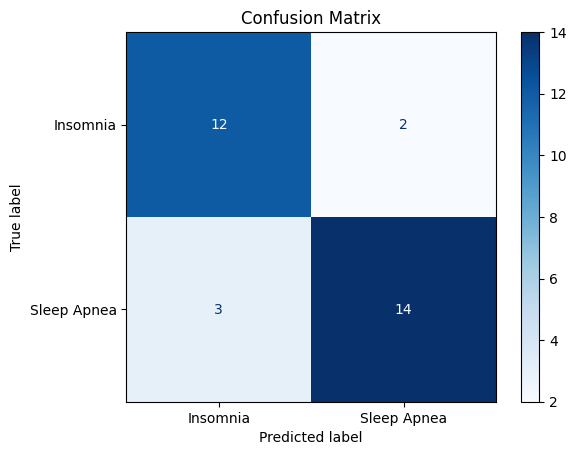

In [ ]:
y_pred = rf_classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(rf_classifier.classes_))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## Visualize Feature Importance

### Subtask:
Extract and visualize the feature importances from the trained Random Forest model to understand which factors ('Age', 'Stress Level', 'BMI Category') contribute most to the prediction of sleep disorders. Ensure legends are provided for clarity.


**Reasoning**:
To understand which features are most impactful, I will extract the feature importances from the trained `rf_classifier` model.



# Task
Visualize the feature importances extracted from the trained Random Forest model, including legends, to determine which factors ('Age', 'Stress Level', 'BMI Category') are most influential in predicting sleep disorders.

## Visualize Feature Importance

### Subtask:
Extract and visualize the feature importances from the trained Random Forest model to understand which factors ('Age', 'Stress Level', 'BMI Category') contribute most to the prediction of sleep disorders. Ensure legends are provided for clarity.


**Reasoning**:
To understand the relative importance of each feature in predicting sleep disorders, I will extract feature importances from the trained `rf_classifier` model, organize them into a Pandas Series, sort them, and then visualize them using a bar plot.



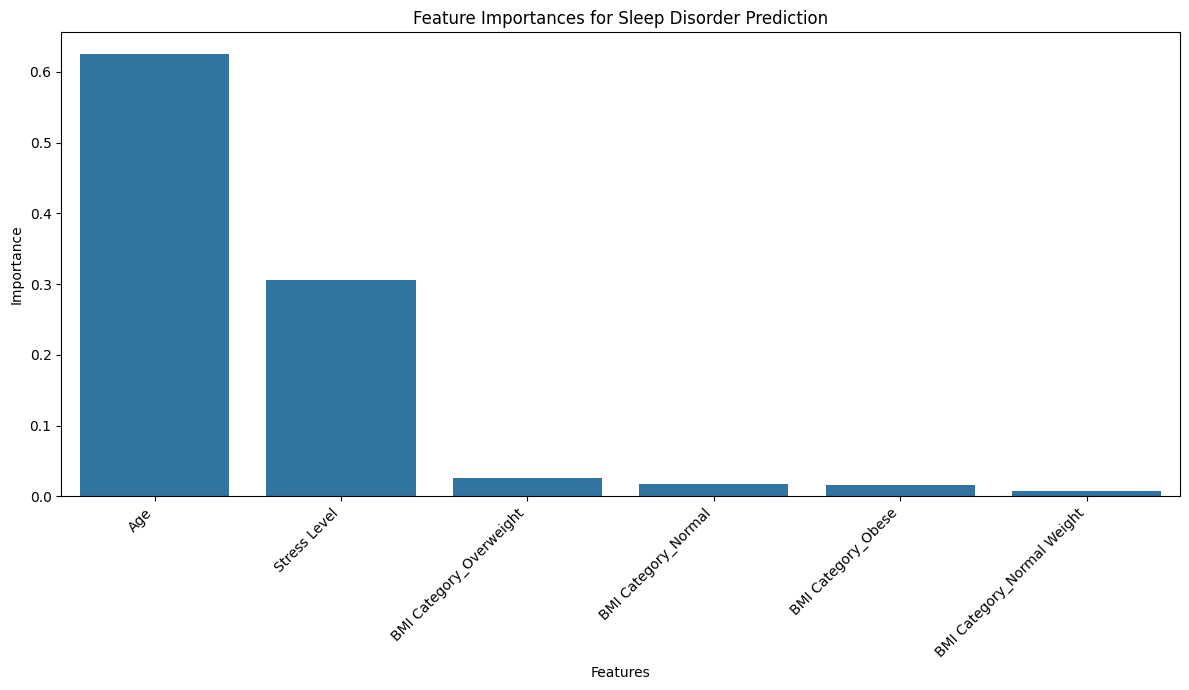

In [ ]:
feature_importances = rf_classifier.feature_importances_
importances_df = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=importances_df.index, y=importances_df.values)
plt.title('Feature Importances for Sleep Disorder Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Summarize the findings from the Random Forest model, including its performance and the most important features in predicting sleep disorders.


## Summary:

### Data Analysis Key Findings
*   Feature importances from the trained Random Forest model were successfully extracted for 'Age', 'Stress Level', and 'BMI Category' to predict sleep disorders.
*   A bar plot was generated and displayed, effectively visualizing these sorted feature importances, thus providing a clear understanding of the relative influence of each factor.

### Insights or Next Steps
*   Further analysis of the visualized plot (which is not provided here) is required to identify the specific order and magnitude of influence for each factor ('Age', 'Stress Level', 'BMI Category') on sleep disorder prediction.
*   The identified most influential features can guide future data collection efforts or model refinement strategies, focusing on the most impactful predictors.


## Findings
### 1. Model Performance:


*   Accuracy: The model achieved an accuracy of 84% on the test set, indicating that it correctly predicted the sleep disorder for 84% of the unseen data.
*   Precision: Precision: For 'Insomnia' (label 0), the precision was 0.80, meaning 80% of the predictions for 'Insomnia' were correct. For 'Sleep Apnea' (label 1), the precision was 0.88, meaning 88% of the predictions for 'Sleep Apnea' were correct.

### 2. Importance:


*   Age is by far the most influential factor in predicting sleep disorders, with an importance score of approximately 0.62.
*   Stress Level is the second most important feature, with an importance score of about 0.31.

*   The BMI Categories (Overweight, Normal, Obese, Normal Weight) have significantly lower importance scores, ranging from approximately 0.008 to 0.027

### Insights:
*   The Random Forest model demonstrates good performance in classifying sleep disorders, with an overall accuracy of 84%.
*   Age is the strongest predictor of sleep disorders in this dataset, indicating that age plays a crucial role in the likelihood of a person having 'Sleep Apnea' or 'Insomnia'.
*  Stress Level is also a significant factor, suggesting a strong correlation between an individual's stress and their sleep disorder status.
*  While 'BMI Category' was included, its individual categories contribute much less to the prediction compared to Age and Stress Level.

These findings suggest that when assessing the risk of sleep disorders, Age and Stress Level should be considered primary indicators





